<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Stoner_Wohlfarth_Astroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Field to apply in mT: 300
Angle between the field and the easy axis (in degrees): 60


<ipython-input-1-2c034107f9c6>:54: RuntimeWarning: divide by zero encountered in divide
  Hx4 = (Hz / tand(theta)) - (np.cos(np.radians(2*theta)) / sind(theta))
<ipython-input-1-2c034107f9c6>:54: RuntimeWarning: invalid value encountered in subtract
  Hx4 = (Hz / tand(theta)) - (np.cos(np.radians(2*theta)) / sind(theta))


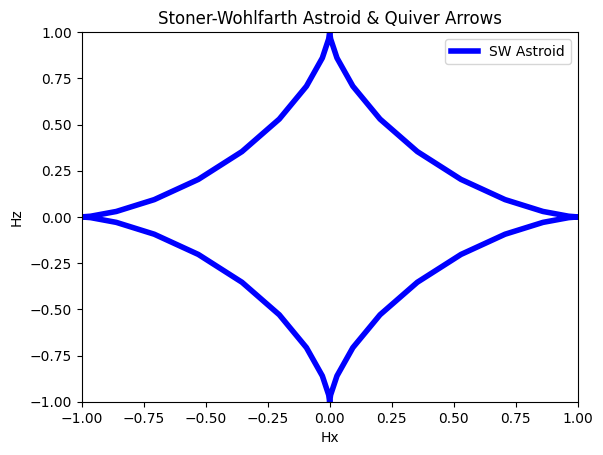

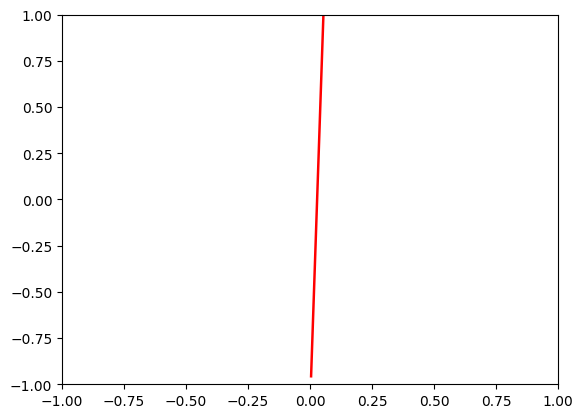

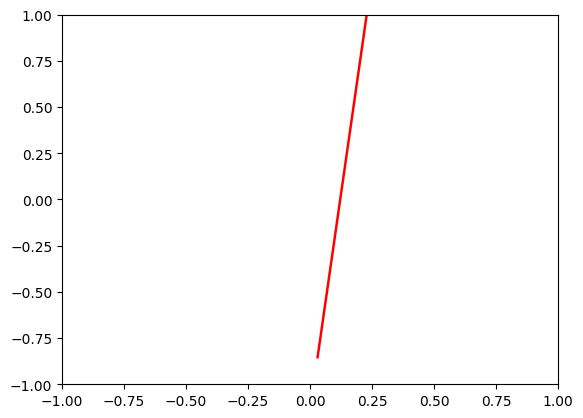

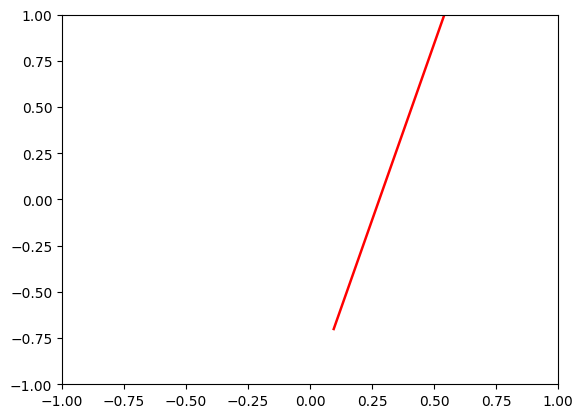

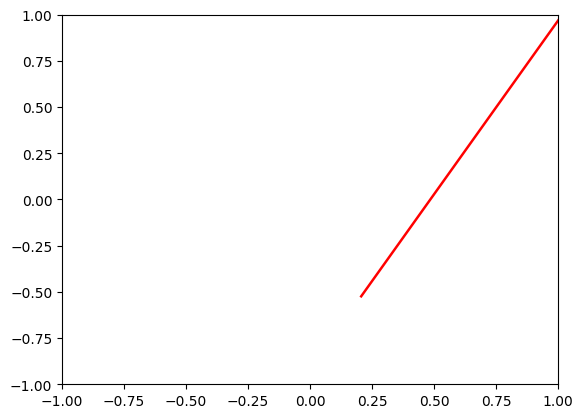

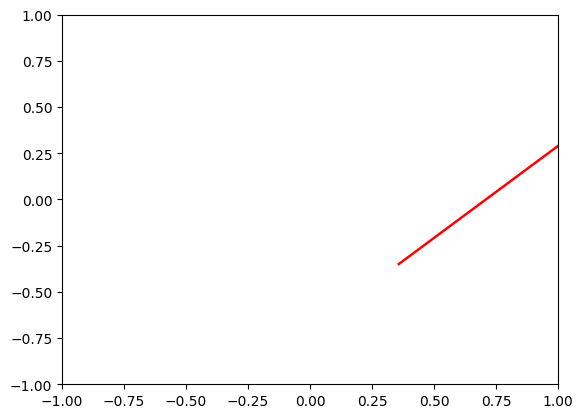

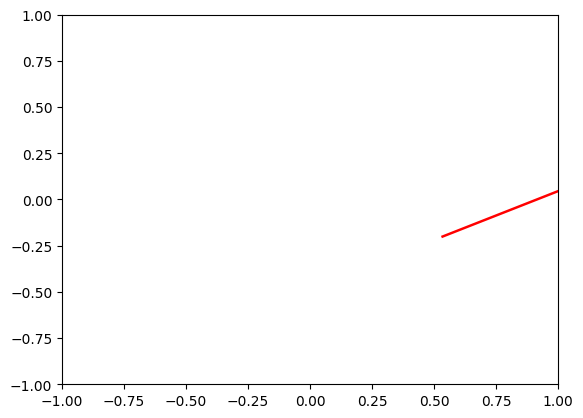

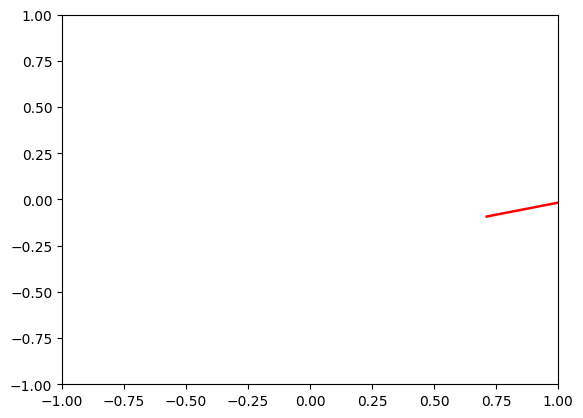

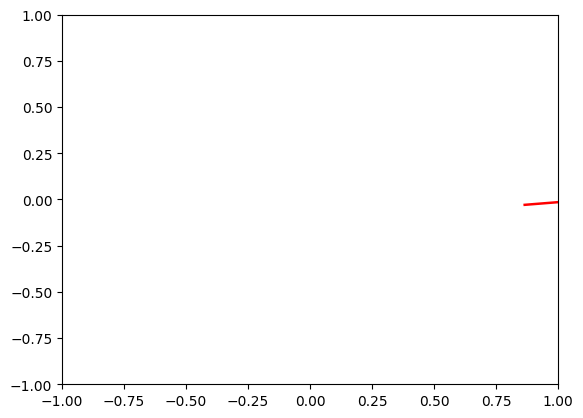

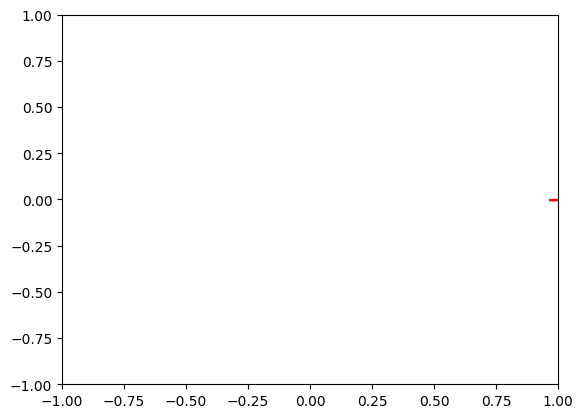

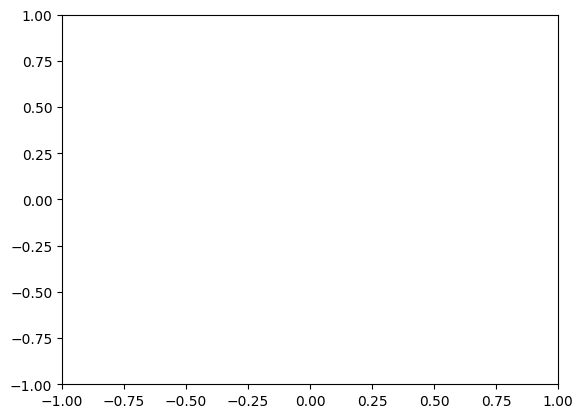

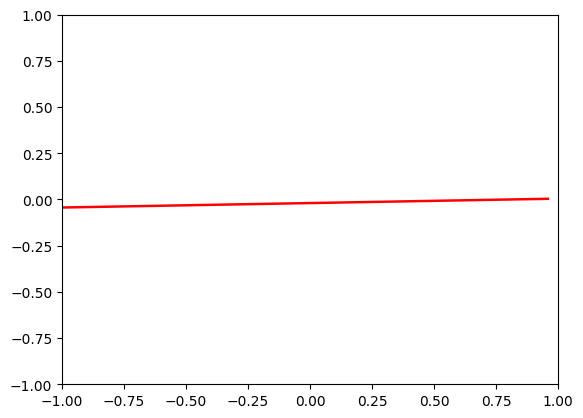

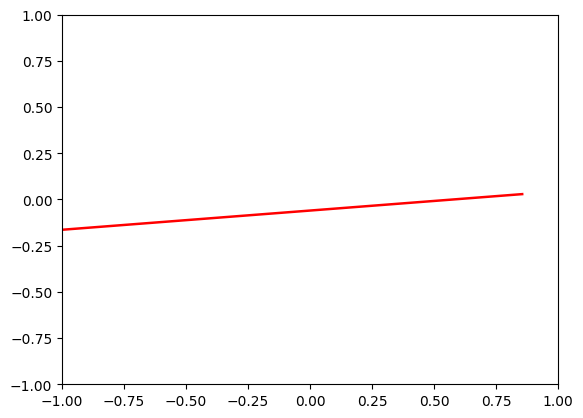

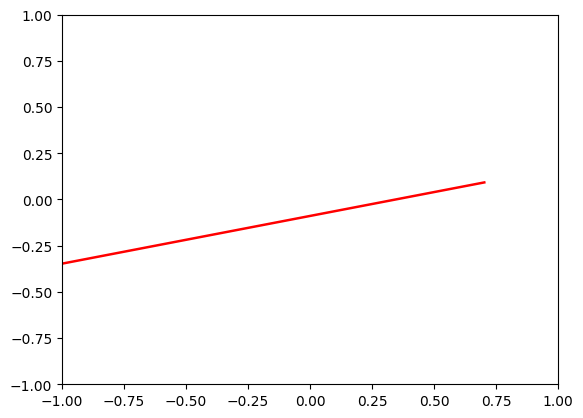

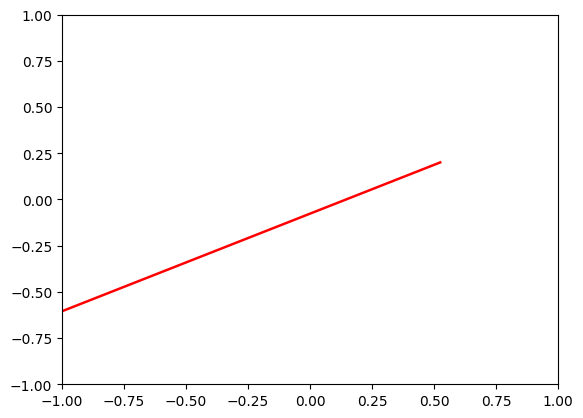

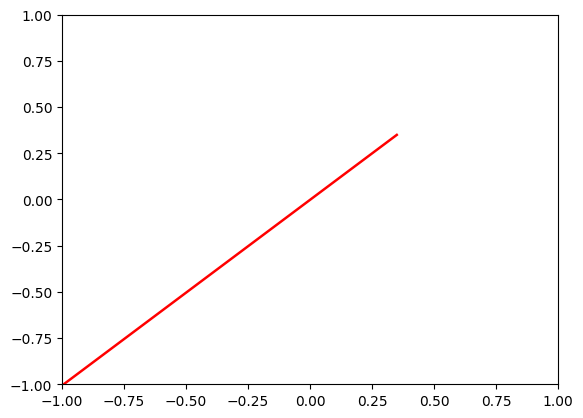

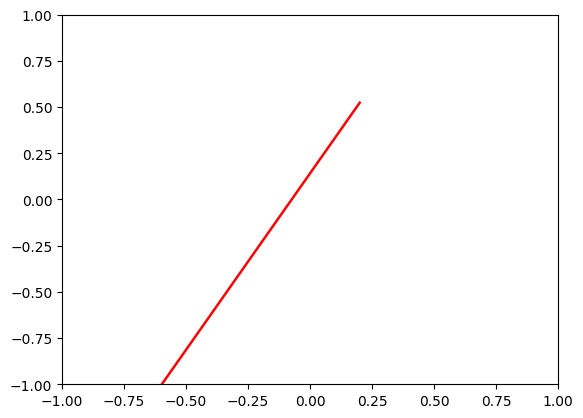

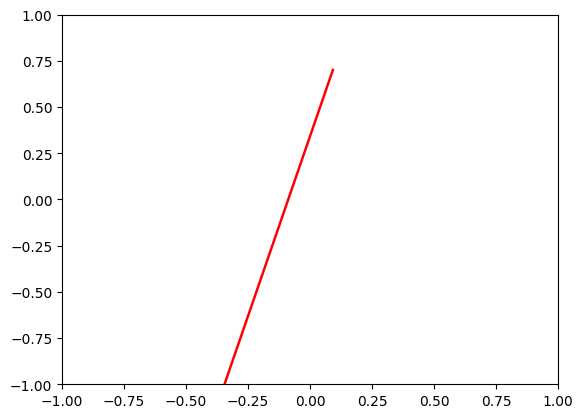

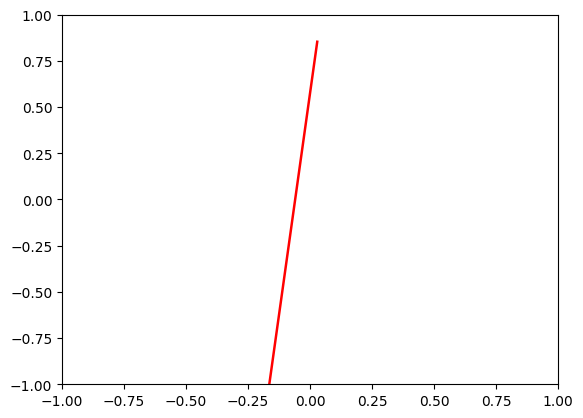

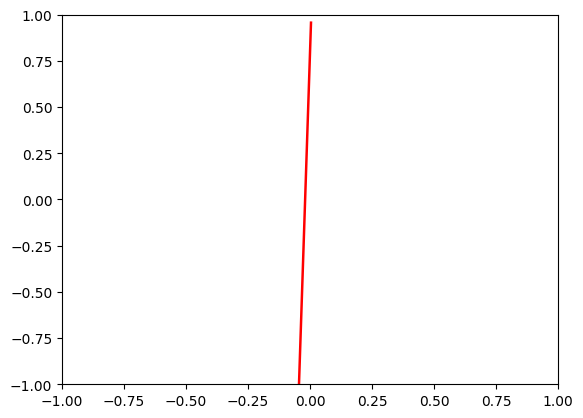

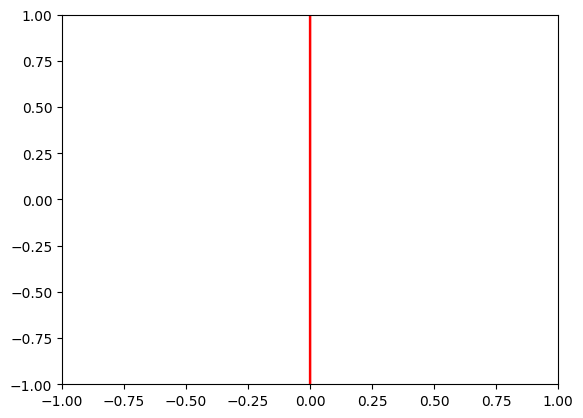

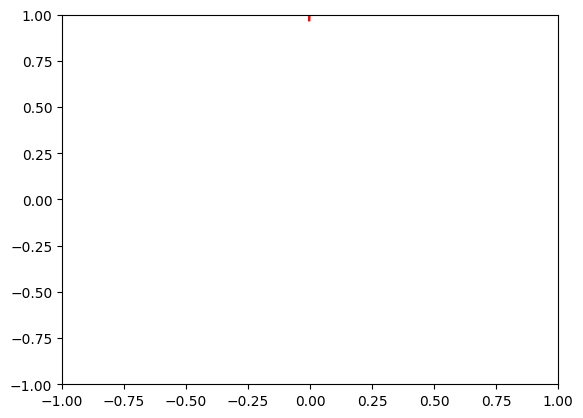

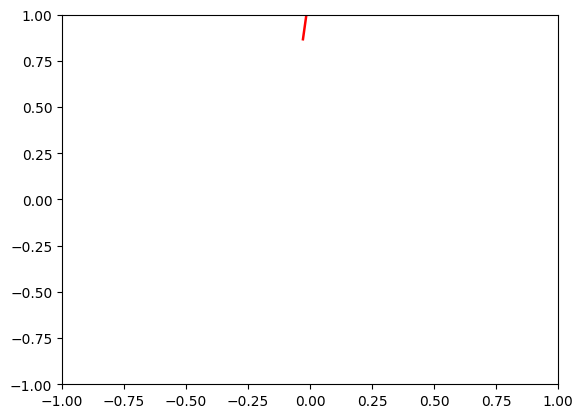

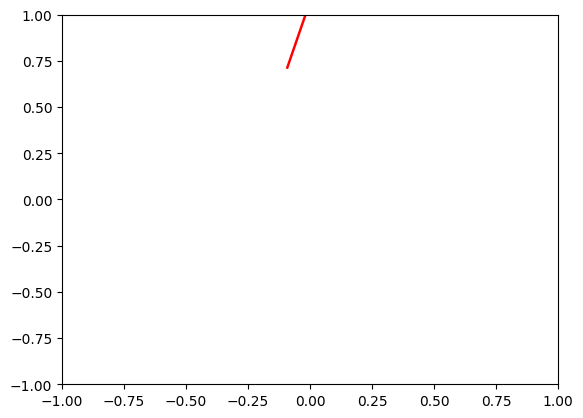

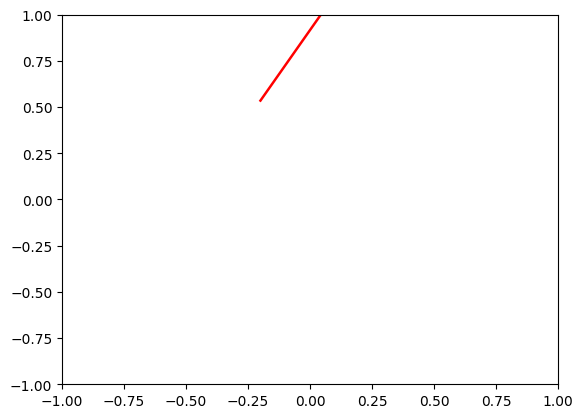

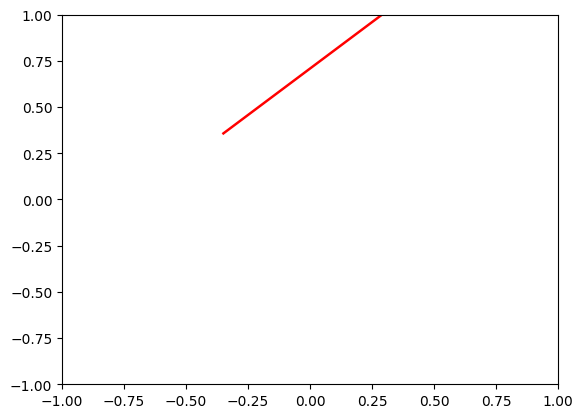

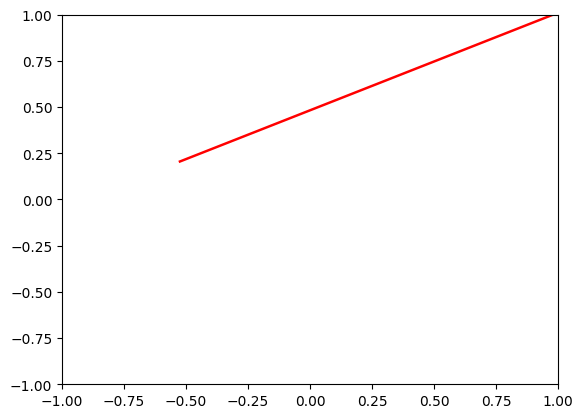

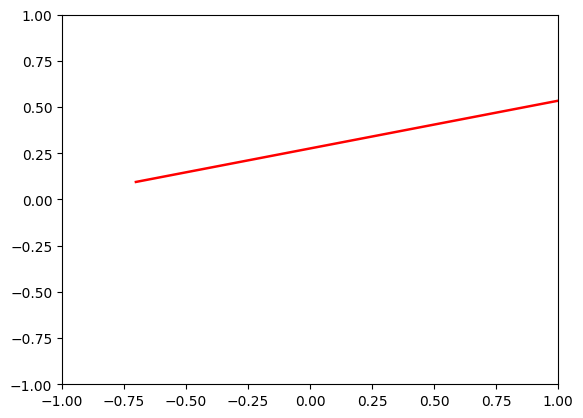

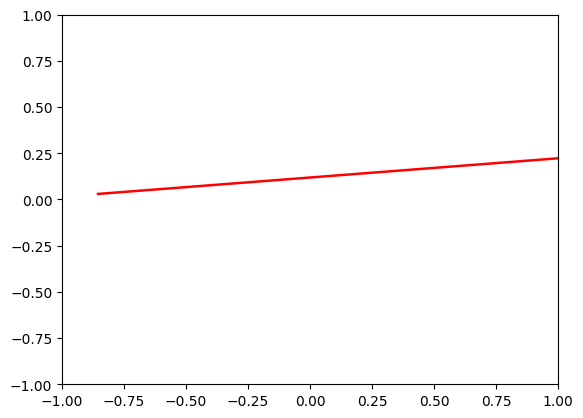

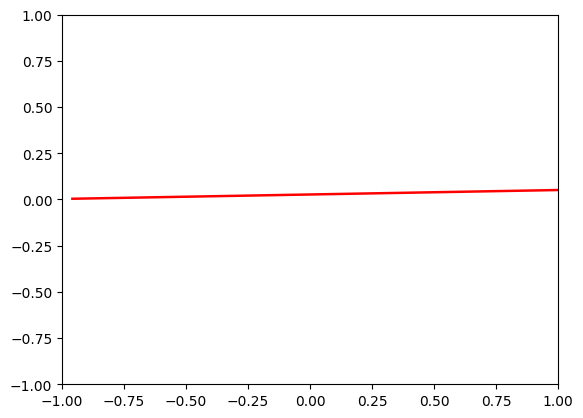

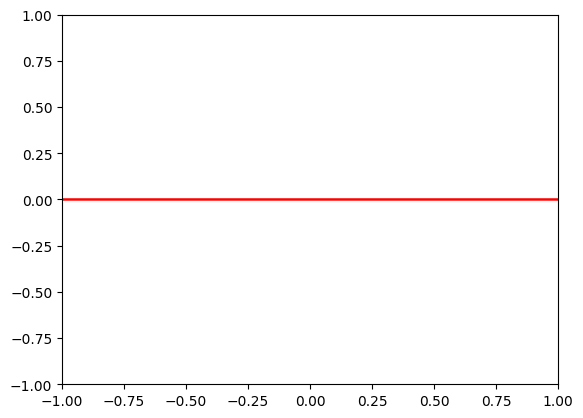

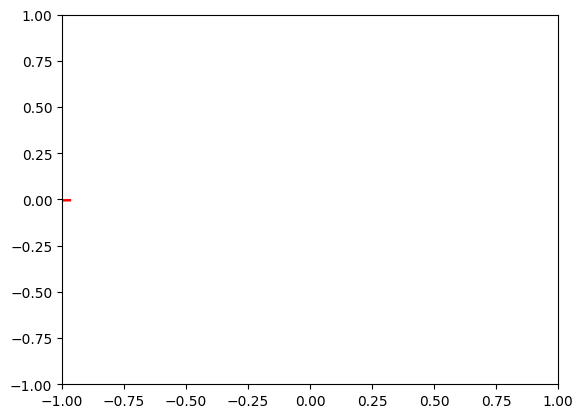

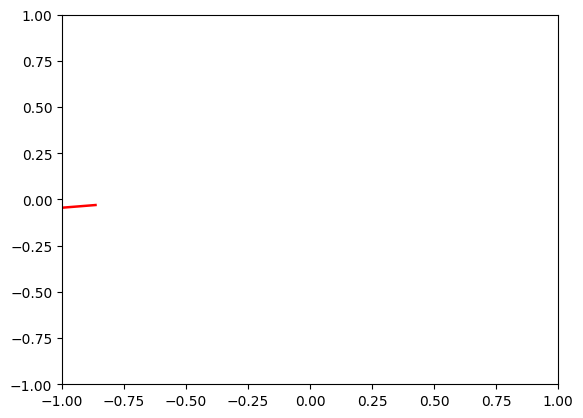

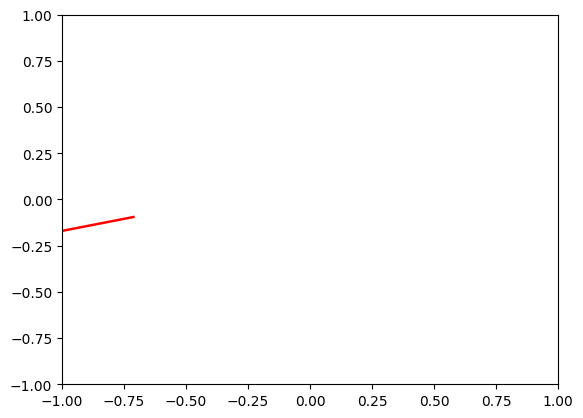

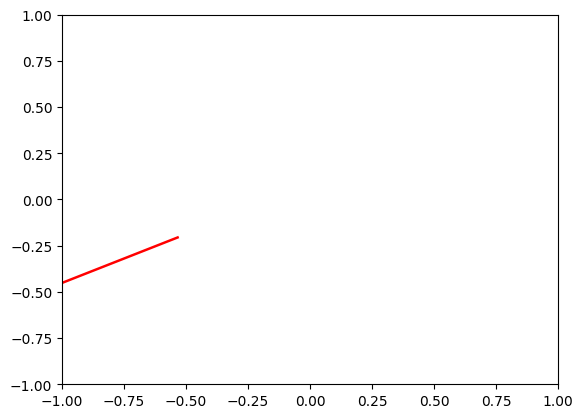

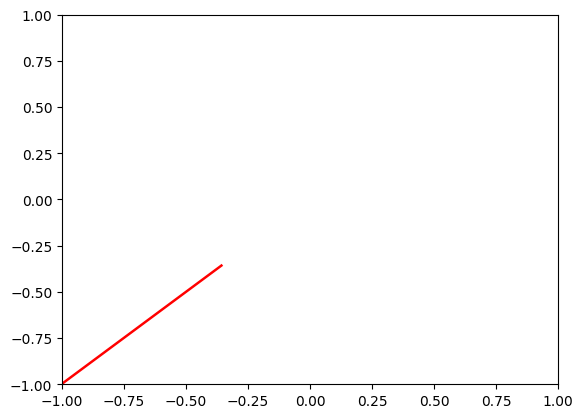

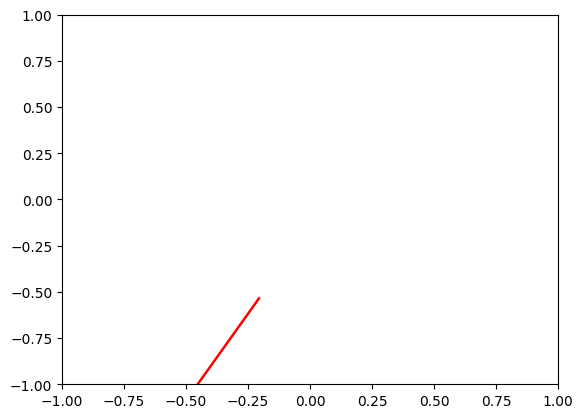

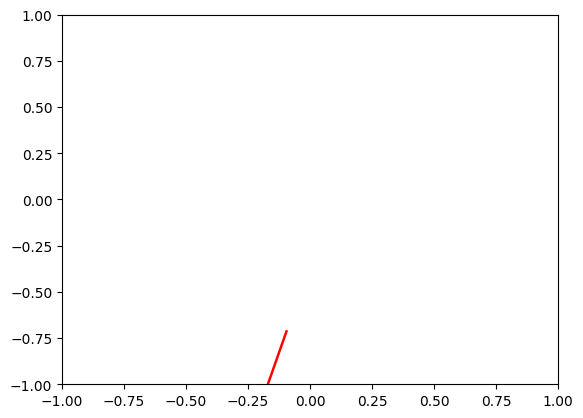

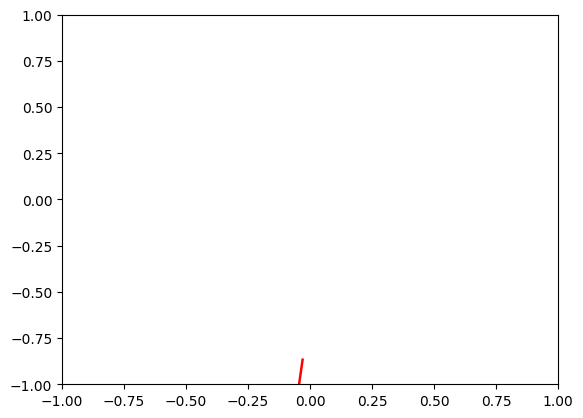

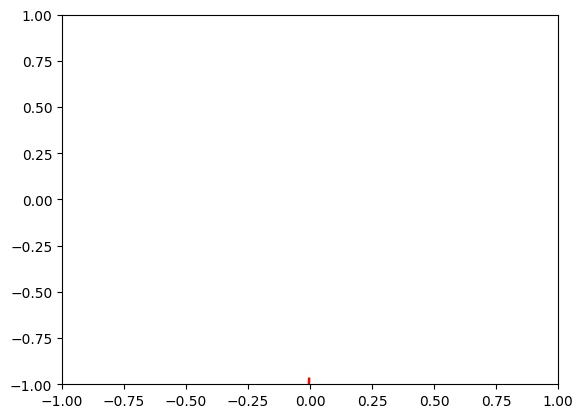

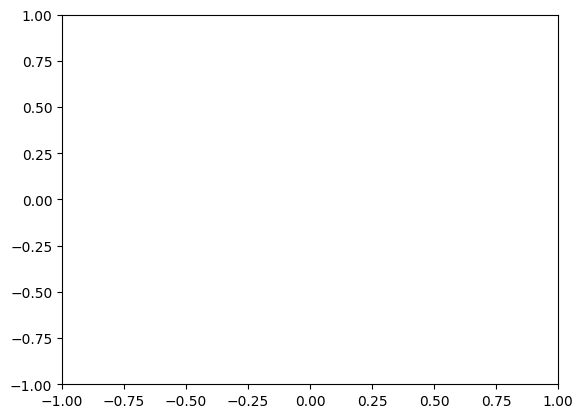

In [1]:
#!/usr/bin/env python3
"""
Program to plot an example Stoner-Wohlfarth astroid and animate quiver arrows,
mimicking the original MATLAB code by Debi Prasad Pattnaik,
"""

import numpy as np
import matplotlib.pyplot as plt

def cosd(x):
    """Cosine of x given in degrees."""
    return np.cos(np.radians(x))

def sind(x):
    """Sine of x given in degrees."""
    return np.sin(np.radians(x))

def tand(x):
    """Tangent of x given in degrees."""
    return np.tan(np.radians(x))

def main():
    # Request user input (similar to MATLAB's input(...) calls)
    H0 = float(input('Field to apply in mT: '))
    theta0 = float(input('Angle between the field and the easy axis (in degrees): '))

    # Step size in degrees
    dtheta = 9
    # Generate an array of angles from 0 to 360 inclusive, stepping by dtheta
    theta = np.arange(0, 360 + dtheta, dtheta)

    # Components of the applied field
    Hz = H0*cosd(theta0)  # z-component
    Hx = H0*sind(theta0)  # x-component

    # -- The following lines replicate W1, W2, their gradients, etc. --
    # (Even if unused, shown for completeness.)
    W1 = (cosd(theta)**2) - 2*H0*cosd(theta - theta0)
    W2 = (cosd(theta)**2) - 2*Hz*cosd(theta) - 2*Hx*sind(theta)

    # Numerically compute first and second derivatives (gradient) wrt theta
    dw  = np.gradient(W2, dtheta)
    d2w = np.gradient(dw, dtheta)

    # Astroid equations
    Hz2 = -cosd(theta)**3
    Hx2 =  sind(theta)**3

    # For the quiver directions:
    # Equation #14 in the original notes
    Hx3 = Hz*tand(theta) + sind(theta)
    # Equation #15 in the original notes
    Hx4 = (Hz / tand(theta)) - (np.cos(np.radians(2*theta)) / sind(theta))

    # Set up figure
    plt.figure()
    plt.ion()  # Turn on interactive plotting

    # Plot the astroid
    plt.plot(Hx2, Hz2, 'b-', linewidth=4, label='SW Astroid')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel('Hx')
    plt.ylabel('Hz')
    plt.title('Stoner-Wohlfarth Astroid & Quiver Arrows')
    plt.legend()

    # "l" is the number of steps in theta, ignoring that we started from 0
    l = (np.max(theta) / dtheta)

    # Break the loop into 4 segments, just like the MATLAB code
    # NOTE: Because Python indexing starts at 0, we adjust slightly
    segments = [
        (0, int(l/4)),
        (int(l/4), int(l/2)),
        (int(l/2), int(3*l/4)),
        (int(3*l/4), int(l+1))  # +1 so we include the end
    ]

    for start_idx, end_idx in segments:
        for i in range(start_idx, end_idx):
            # Draw a single vector at (Hx2[i], Hz2[i]) pointing in (Hx3[i], Hx4[i])
            plt.quiver(
                Hx2[i], Hz2[i],     # base of the arrow
                Hx3[i], Hx4[i],     # direction of the arrow
                angles='xy', scale_units='xy', scale=1.0, color='r',
                width=0.005
            )
            plt.xlim([-1, 1])
            plt.ylim([-1, 1])
            plt.draw()
            plt.pause(0.5)  # half-second pause (mimics MATLAB's pause(0.5))

    # Keep the final plot open
    plt.ioff()
    plt.show()

if __name__ == "__main__":
    main()
